In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

In [3]:


od.download("https://www.kaggle.com/competitions/oilgas-field-prediction/")

100%|██████████| 24.4k/24.4k [00:00<00:00, 8.88MB/s]


Extracting archive ./oilgas-field-prediction/oilgas-field-prediction.zip to ./oilgas-field-prediction


In [4]:
df = pd.read_csv("/content/oilgas-field-prediction/train_oil.csv")
df

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIDES,IMBURU-TORO,PAPUA NEW GUINEA,FAR EAST,PAPUAN FTB,COMPRESSION,-6.0136,142.8409,OIL SEARCH LTD,ONSHORE,GAS-CONDENSATE,CONTINUING DEVELOPMENT,THRUST,9905,JURASSIC-CRETACEOUS,SANDSTONE,490.0,240.0,10.0,100.0
305,DRAKE POINT,DRAKE POINT-INTREPID INLET,CANADA,NORTH AMERICA,SVERDRUP,COMPRESSION/EVAPORITE/EXTENSION/LINKED,76.4462,-108.9172,PANARCTIC OILS,ONSHORE,GAS,UNDEVELOPED,FORELAND,3390,JURASSIC,SANDSTONE,100.0,71.0,20.0,566.0
306,ALTAMONT-BLUEBELL,GREEN RIVER AND COLTON/WASATCH,USA,NORTH AMERICA,UINTA,COMPRESSION,40.3000,-110.2100,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250,PALEOGENE,SANDSTONE,8000.0,575.0,5.0,0.1
307,BELL CREEK,MUDDY,USA,NORTH AMERICA,POWDER RIVER,COMPRESSION,45.1039,-105.0967,SAMUEL GARY,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,4300,CRETACEOUS,SANDSTONE,45.0,23.0,28.5,2250.0


<ipython-input-11-93eb70b69012>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


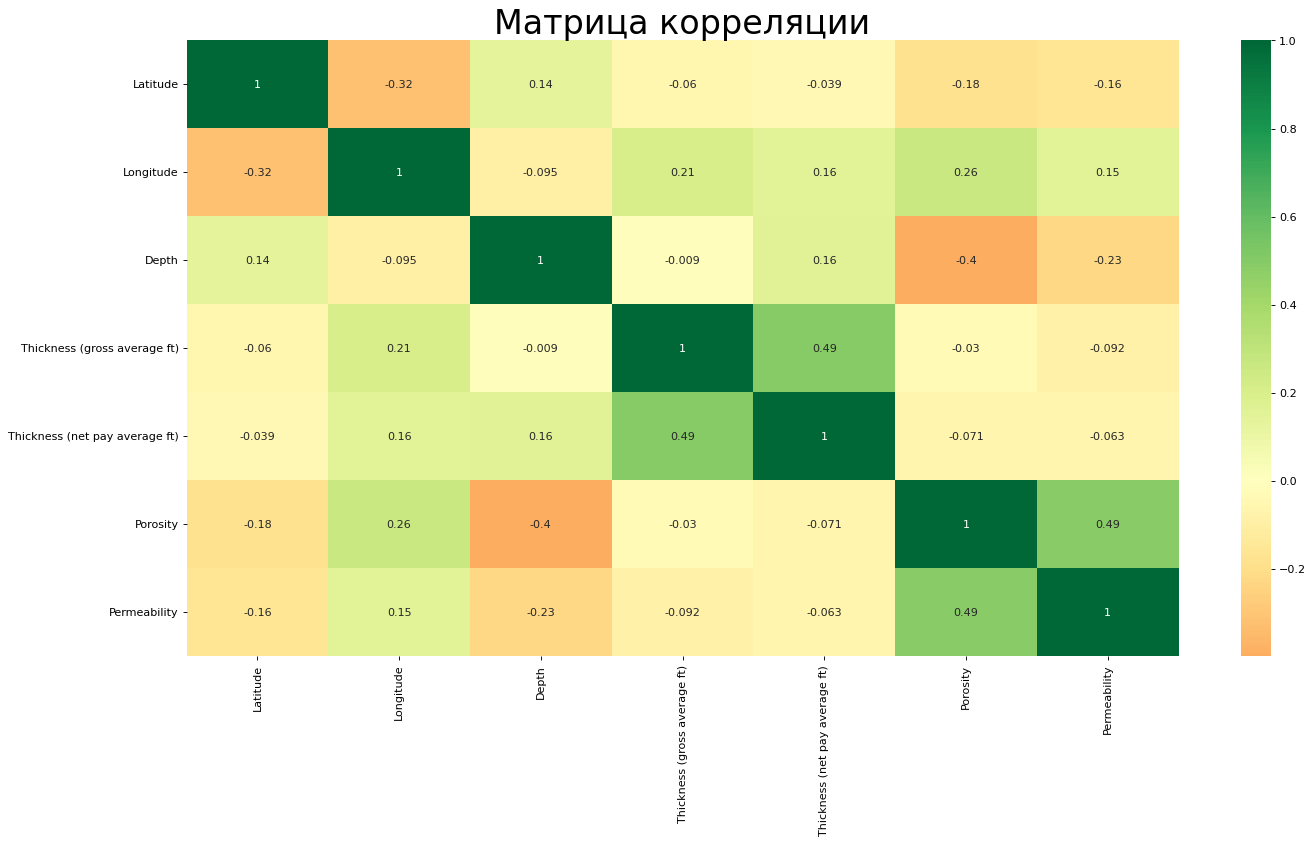

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#корелляция между признаками небольшая(<0.5)

In [7]:
df.isna().sum()


Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [ ]:
df["Longitude"].value_counts()

 97.5663     3
 2.0694      3
-94.2574     2
-110.0276    2
 56.7018     2
            ..
-111.1427    1
-95.5906     1
 90.3500     1
 1.3167      1
-105.1392    1
Name: Longitude, Length: 260, dtype: int64

In [12]:
df["Country"] = df["Country"].fillna('USA')


In [13]:

df["Region"] = df["Region"].fillna('NORTH AMERICA')


In [14]:

df["Basin name"] = df["Basin name"].fillna('WESTERN CANADA')


In [15]:
df["Latitude"] = df["Latitude"].fillna(df["Latitude"].mean())


In [16]:

df["Longitude"] = df["Longitude"].fillna(df["Longitude"].mean())


In [ ]:
df['Onshore/Offshore']

0      1
1      1
2      1
3      0
4      1
      ..
304    1
305    1
306    1
307    1
308    1
Name: Onshore/Offshore, Length: 309, dtype: int64

In [ ]:
df.isna().sum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         309 non-null    object 
 3   Region                          309 non-null    object 
 4   Basin name                      309 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        309 non-null    float64
 7   Longitude                       309 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

In [ ]:
df["Reservoir status"].unique()

array(['DECLINING PRODUCTION', 'NEARLY DEPLETED', 'REJUVENATING',
       'UNKNOWN', 'MATURE PRODUCTION', 'PLATEAU PRODUCTION', 'DEVELOPING',
       'UNDEVELOPED', 'ABANDONED', 'SECOND PLATEAU PRODUTION',
       'TEMPORARILY SHUT-IN', 'CONTINUING DEVELOPMENT', 'DEPLETED'],
      dtype=object)

In [ ]:
df1= df["Tectonic regime"].str.get_dummies(sep='/')
df2= df["Structural setting"].str.get_dummies(sep='/')
df3= df["Operator company"].str.get_dummies(sep='/')
df4= df["Reservoir period"].str.get_dummies(sep='-')
df1 = df1.add_suffix(' Tectonic regime')
df2 = df2.add_suffix(' Structural setting')
df3=df3.add_suffix(" Operator company")
df4=df4.add_suffix(" Reservoir period")
df=pd.concat([df1, df ,df2, df3,df4], axis=1)
df=df.drop(["Tectonic regime","Structural setting","Operator company", "Reservoir period"],axis=1)

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Onshore/Offshore']) 
df['Onshore/Offshore'] = label_encoder.transform(df['Onshore/Offshore']) 


In [18]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Field name']) 
df['Field name'] = label_encoder.transform(df['Field name']) 

In [19]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Reservoir unit']) 
df['Reservoir unit'] = label_encoder.transform(df['Reservoir unit']) 

In [20]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Country']) 
df['Country'] = label_encoder.transform(df['Country']) 

In [21]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Region']) 
df['Region'] = label_encoder.transform(df['Region']) 

In [22]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Basin name']) 
df['Basin name'] = label_encoder.transform(df['Basin name']) 

In [23]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Hydrocarbon type']) 
df['Hydrocarbon type'] = label_encoder.transform(df['Hydrocarbon type']) 

In [24]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Reservoir status']) 
df['Reservoir status'] = label_encoder.transform(df['Reservoir status']) 

In [25]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Lithology']) 
df['Lithology'] = label_encoder.transform(df['Lithology']) 

In [26]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Tectonic regime']) 
df['Tectonic regime'] = label_encoder.transform(df['Tectonic regime']) 

In [27]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Structural setting']) 
df['Structural setting'] = label_encoder.transform(df['Structural setting']) 

In [28]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Operator company']) 
df['Operator company'] = label_encoder.transform(df['Operator company']) 

In [29]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Reservoir period']) 
df['Reservoir period'] = label_encoder.transform(df['Reservoir period']) 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    int64  
 1   Reservoir unit                  309 non-null    int64  
 2   Country                         309 non-null    int64  
 3   Region                          309 non-null    int64  
 4   Basin name                      309 non-null    int64  
 5   Tectonic regime                 309 non-null    int64  
 6   Latitude                        309 non-null    float64
 7   Longitude                       309 non-null    float64
 8   Operator company                309 non-null    int64  
 9   Onshore/Offshore                309 non-null    int64  
 10  Hydrocarbon type                309 non-null    int64  
 11  Reservoir status                309 non-null    int64  
 12  Structural setting              309 

In [29]:
df

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,Operator companyg
0,284,135,27,3,86,5,51.0000,44.8042,75,1,...,2,5,1870,2,7,262.0,33.0,24.0,30.0,75
1,136,108,4,4,20,18,-19.6017,-39.8332,88,1,...,6,15,4843,14,7,2133.0,72.0,23.0,350.0,88
2,0,16,28,5,81,5,26.0800,49.8100,104,1,...,8,5,6050,9,5,250.0,184.0,21.0,410.0,104
3,165,38,38,1,51,18,61.3833,1.7500,34,0,...,6,16,8988,9,7,425.0,300.0,22.0,750.0,34
4,263,150,5,6,88,0,53.2287,-115.8008,77,1,...,12,5,9306,6,3,233.0,167.0,11.8,1407.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,108,90,25,2,56,0,-6.0136,142.8409,79,1,...,1,32,9905,10,7,490.0,240.0,10.0,100.0,79
305,66,64,5,6,78,6,76.4462,-108.9172,83,1,...,11,5,3390,9,7,100.0,71.0,20.0,566.0,83
306,6,76,39,6,84,0,40.3000,-110.2100,77,1,...,5,5,15250,14,7,8000.0,575.0,5.0,0.1,77
307,28,146,39,6,62,0,45.1039,-105.0967,102,1,...,6,5,4300,4,7,45.0,23.0,28.5,2250.0,102


In [23]:
test = pd.read_csv("/content/oilgas-field-prediction/oil_test.csv")
test

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,YIHEZHUANG,MAJIAGOU-BADOU,CHINA,FAR EAST,BOHAI,EXTENSION,37.9167,118.4333,SINOPEC,OIL,NEARLY DEPLETED,RIFT,5970,ORDOVICIAN,DOLOMITE,560.0,82.0,2.5,8.4
129,YOWLUMNE,STEVENS,USA,NORTH AMERICA,SAN JOAQUIN,COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,35.0461,-119.1904,CASTLE PEAK RESOURCES,OIL,NEARLY DEPLETED,WRENCH/FOREARC,11100,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,150.0,20.0,75.0
130,ZAOYUAN,KONGDIAN-1 (ZAOBEI BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,OIL,MATURE PRODUCTION,RIFT,5384,PALEOGENE,SANDSTONE,230.0,69.0,26.7,1872.0
131,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,OIL,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.2,121.0


In [24]:
test["Country"] = test["Country"].fillna('USA')

In [25]:
test["Region"] = test["Region"].fillna('NORTH AMERICA')

In [26]:
test["Latitude"] = test["Latitude"].fillna(test["Latitude"].mean())


In [27]:
test["Longitude"] = test["Longitude"].fillna(test["Longitude"].mean())

In [28]:
test["Basin name"] = test["Basin name"].fillna('WESTERN CANADA')

In [ ]:
df1t= test["Tectonic regime"].str.get_dummies(sep='/')
df2t= test["Structural setting"].str.get_dummies(sep='/')
df3t= test["Operator company"].str.get_dummies(sep='/')
dft4= test["Reservoir period"].str.get_dummies(sep='-')
df1t = df1t.add_suffix(' Tectonic regime')
df2t = df2t.add_suffix(' Structural setting')
df3t=df3t.add_suffix(" Operator company")
dft4=dft4.add_suffix(" Reservoir period")
test=pd.concat([df1t, test,df2t,df3t,dft4], axis=1)
test=test.drop(["Tectonic regime","Structural setting","Reservoir period","Operator company"],axis=1)

In [ ]:
test

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,SHALE Tectonic regime,...,JURASSIC Reservoir period,NEOGENE Reservoir period,ORDOVICIAN Reservoir period,ORDOVICIAN/CARBONIFEROUS Reservoir period,PALEOGENE Reservoir period,PALEOZOIC Reservoir period,PERMIAN Reservoir period,PROTEROZOIC Reservoir period,SILURIAN Reservoir period,TRIASSIC Reservoir period
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
129,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
130,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
131,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Field name']) 
test['Field name'] = label_encoder.transform(test['Field name']) 

In [30]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Reservoir unit']) 
test['Reservoir unit'] = label_encoder.transform(test['Reservoir unit']) 

In [31]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Country']) 
test['Country'] = label_encoder.transform(test['Country']) 

In [32]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Region']) 
test['Region'] = label_encoder.transform(test['Region']) 

In [33]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Basin name']) 
test['Basin name'] = label_encoder.transform(test['Basin name']) 

In [34]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Hydrocarbon type']) 
test['Hydrocarbon type'] = label_encoder.transform(test['Hydrocarbon type']) 

In [35]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Reservoir status']) 
test['Reservoir status'] = label_encoder.transform(test['Reservoir status']) 

In [36]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Lithology']) 
test['Lithology'] = label_encoder.transform(test['Lithology']) 

In [37]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Structural setting']) 
test['Structural setting'] = label_encoder.transform(test['Structural setting']) 

In [38]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Tectonic regime']) 
test['Tectonic regime'] = label_encoder.transform(test['Tectonic regime']) 

In [39]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Operator company']) 
test['Operator company'] = label_encoder.transform(test['Operator company']) 

In [40]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(test['Reservoir period']) 
test['Reservoir period'] = label_encoder.transform(test['Reservoir period']) 

In [41]:
y=df['Onshore/Offshore']
y

0      1
1      1
2      1
3      0
4      1
      ..
304    1
305    1
306    1
307    1
308    1
Name: Onshore/Offshore, Length: 309, dtype: int64

In [42]:
x=df.drop(["Onshore/Offshore"],axis=1)
x

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,284,135,27,3,86,5,51.0000,44.8042,75,3,2,5,1870,2,7,262.0,33.0,24.0,30.0
1,136,108,4,4,20,18,-19.6017,-39.8332,88,3,6,15,4843,14,7,2133.0,72.0,23.0,350.0
2,0,16,28,5,81,5,26.0800,49.8100,104,3,8,5,6050,9,5,250.0,184.0,21.0,410.0
3,165,38,38,1,51,18,61.3833,1.7500,34,3,6,16,8988,9,7,425.0,300.0,22.0,750.0
4,263,150,5,6,88,0,53.2287,-115.8008,77,3,12,5,9306,6,3,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,108,90,25,2,56,0,-6.0136,142.8409,79,2,1,32,9905,10,7,490.0,240.0,10.0,100.0
305,66,64,5,6,78,6,76.4462,-108.9172,83,1,11,5,3390,9,7,100.0,71.0,20.0,566.0
306,6,76,39,6,84,0,40.3000,-110.2100,77,3,5,5,15250,14,7,8000.0,575.0,5.0,0.1
307,28,146,39,6,62,0,45.1039,-105.0967,102,3,6,5,4300,4,7,45.0,23.0,28.5,2250.0


In [43]:
std = StandardScaler()
stanx = std.fit_transform(x) # type - numpy array

stanx = pd.DataFrame(stanx,columns = x.columns)
stanx

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,1.735870,0.078918,0.120682,-0.466450,1.133769,-0.742407,0.726578,0.699452,0.265871,0.544292,-1.100450,-0.972534,-1.348806,-1.302399,0.502978,-0.368478,-0.534726,0.862473,-0.447657
1,-0.064729,-0.290561,-1.503723,-0.008885,-1.184699,0.034423,-2.609693,-0.333475,0.618231,0.544292,0.410835,0.023202,-0.528038,0.927193,0.502978,1.015662,-0.396327,0.722798,-0.127183
2,-1.719333,-1.549527,0.191308,0.448681,0.958127,-0.742407,-0.451012,0.760543,1.051906,0.544292,1.166477,-0.972534,-0.194817,-0.001804,-0.453454,-0.377356,0.001124,0.443446,-0.067094
3,0.288091,-1.248470,0.897571,-1.381581,-0.095722,0.034423,1.217239,0.174012,-0.845419,0.544292,0.410835,0.122775,0.616288,-0.001804,0.502978,-0.247893,0.412770,0.583122,0.273410
4,1.480380,0.284184,-1.433096,0.906246,1.204026,-1.041187,0.831895,-1.260595,0.320080,0.544292,2.677762,-0.972534,0.704080,-0.559202,-1.409886,-0.389932,-0.059203,-0.841572,0.931383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.405383,-0.536881,-0.020571,-0.924016,0.079920,-1.041187,-1.967589,1.895906,0.374290,-0.769662,-1.478271,1.715952,0.869448,0.183995,0.502978,-0.199807,0.199850,-1.092988,-0.377553
305,-0.916364,-0.892675,-1.433096,0.906246,0.852742,-0.682650,1.929033,-1.176587,0.482708,-2.083617,2.299941,-0.972534,-0.929174,-0.001804,0.502978,-0.488324,-0.399876,0.303770,0.089137
306,-1.646336,-0.728462,0.968197,0.906246,1.063512,-1.041187,0.220951,-1.192364,0.320080,0.544292,0.033014,-0.972534,2.345063,0.927193,0.502978,5.355988,1.388656,-1.791367,-0.477601
307,-1.378679,0.229446,0.968197,0.906246,0.290690,-1.041187,0.447959,-1.129961,0.997697,0.544292,0.410835,-0.972534,-0.677946,-0.930801,0.502978,-0.529012,-0.570212,1.491015,1.775632


In [ ]:
df

In [ ]:
col1 = df.columns
col2 = test.columns

c = set(col1) & set(col2)

In [ ]:
c

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 147 entries, BASEMENT-I Tectonic regime to TRIASSIC Reservoir period
dtypes: float64(6), int64(141)
memory usage: 152.9 KB


In [ ]:
stanx = stanx[c]
stanx

<ipython-input-130-22b1d9a611fb>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stanx = stanx[c]


,CANADIAN SUPERIOR Operator company,SURGUTNEFTEGAS Operator company,INVERSION Tectonic regime,FORELAND Structural setting,KAZAKHOIL AKTOBE Operator company,Permeability,CAMBRIAN Reservoir period,YAKUTGASPROM Operator company,Porosity,ONGC Operator company,...,PDVSA Operator company,EROSION Tectonic regime,Thickness (net pay average ft),CNOOC Operator company,CRETACEOUS Reservoir period,COMPRESSION Tectonic regime,STRIKE-SLIP Tectonic regime,BAPETCO Operator company,STATOILHYDRO Operator company,PALEOZOIC Reservoir period
0,-0.05698,-0.099015,-0.449816,1.289881,-0.05698,-0.447657,-0.099015,-0.05698,0.862473,-0.128247,...,-0.11452,-0.506061,-0.534726,-0.099015,-0.631023,0.712262,-0.241287,-0.099015,-0.163028,-0.05698
1,-0.05698,-0.099015,-0.449816,-0.775265,-0.05698,-0.127183,-0.099015,-0.05698,0.722798,-0.128247,...,-0.11452,-0.506061,-0.396327,-0.099015,-0.631023,-1.403978,-0.241287,-0.099015,-0.163028,-0.05698
2,-0.05698,-0.099015,-0.449816,1.289881,-0.05698,-0.067094,-0.099015,-0.05698,0.443446,-0.128247,...,-0.11452,-0.506061,0.001124,-0.099015,-0.631023,0.712262,-0.241287,-0.099015,-0.163028,-0.05698
3,-0.05698,-0.099015,-0.449816,-0.775265,-0.05698,0.273410,-0.099015,-0.05698,0.583122,-0.128247,...,-0.11452,-0.506061,0.412770,-0.099015,-0.631023,-1.403978,-0.241287,-0.099015,-0.163028,-0.05698
4,-0.05698,-0.099015,-0.449816,1.289881,-0.05698,0.931383,-0.099015,-0.05698,-0.841572,-0.128247,...,-0.11452,-0.506061,-0.059203,-0.099015,-0.631023,0.712262,-0.241287,-0.099015,-0.163028,-0.05698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.05698,-0.099015,-0.449816,-0.775265,-0.05698,-0.377553,-0.099015,-0.05698,-1.092988,-0.128247,...,-0.11452,-0.506061,0.199850,-0.099015,1.584728,0.712262,-0.241287,-0.099015,-0.163028,-0.05698
305,-0.05698,-0.099015,-0.449816,1.289881,-0.05698,0.089137,-0.099015,-0.05698,0.303770,-0.128247,...,-0.11452,-0.506061,-0.399876,-0.099015,-0.631023,0.712262,-0.241287,-0.099015,-0.163028,-0.05698
306,-0.05698,-0.099015,-0.449816,1.289881,-0.05698,-0.477601,-0.099015,-0.05698,-1.791367,-0.128247,...,-0.11452,-0.506061,1.388656,-0.099015,-0.631023,0.712262,-0.241287,-0.099015,-0.163028,-0.05698
307,-0.05698,-0.099015,-0.449816,1.289881,-0.05698,1.775632,-0.099015,-0.05698,1.491015,-0.128247,...,-0.11452,-0.506061,-0.570212,-0.099015,1.584728,0.712262,-0.241287,-0.099015,-0.163028,-0.05698


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(stanx, y, test_size=0.3)

ЛОГИСТИЧЕСКАЯ

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [46]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)
answers_pred = model.predict(x_test)

In [47]:
accuracy_score(answers_pred,y_test)

0.7849462365591398

In [ ]:
recall_score(answers_pred,y_test)

In [ ]:
precision_score(answers_pred,y_test)

KNN

In [48]:

from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

In [49]:
scores = []
for i in range(1,25):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    answers = knn.predict(x_test) # метод predict возвращает вектор ответов для X_test
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    
   
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,accuracy
0,1,0.806452
1,2,0.741935
2,3,0.827957
3,4,0.795699
4,5,0.817204
5,6,0.795699
6,7,0.784946
7,8,0.806452
8,9,0.784946
9,10,0.806452


In [52]:
knn = KNeighborsClassifier(23)

# обучаем
knn.fit(x_train,y_train)

# предсказываем значения
y_pred = knn.predict(x_test)

In [53]:
accuracy_score(y_pred,y_test)

0.8064516129032258

Деревья решения

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1)

clf.fit(x_train, y_train)
y_pred_tree = clf.predict(x_test)


In [56]:
print("Accuracy:", accuracy_score(y_test,y_pred_tree))

Accuracy: 0.8387096774193549


In [ ]:
std = StandardScaler()
stantest = std.fit_transform(test) # type - numpy array

stantest = pd.DataFrame(stantest,columns = test.columns)
stantest

In [58]:
y_predict = clf.predict(stantest)

In [ ]:
# НАИЛУЧШИЕ МЕТРИКИ  У дерева

In [ ]:
std = StandardScaler()
stantest = std.fit_transform(test) # type - numpy array

stantest = pd.DataFrame(stantest,columns = test.columns)
stantest

In [59]:
y_predict = clf.predict(stantest)

In [65]:
dd=pd.DataFrame(bbb,columns=['Onshore/Offshore'])
dd=dd.reset_index()
dd.to_csv("fffiinaaallly.csv",index=False)


In [ ]:
kak = pd.read_csv("finalll.csv")
kak

,index,Onshore/Offshore
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
88,88,1
89,89,0
90,90,1
91,91,0


In [ ]:
type(y_predict)

numpy.ndarray

In [60]:
y_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
predsc=list(y_predict)
predsc

In [ ]:


for i in range(len(predsc)):
  if(predsc[i]==1):
    predsc[i]="ONSHORE"
  if(predsc[i]==0):
    predsc[i]="OFFSHORE"
  else:
    predsc[i]="ONSHORE-OFFSHORE"
predsc

In [64]:
bbb=np.array(predsc)

In [ ]:
bbb

In [ ]:
nh=np.array()

In [ ]:
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1])